In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
# from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from copy import deepcopy
from src.multi_model_large_ensemble import MultiModelLargeEnsemble

### Load Data 

#### tasmax

In [3]:
# load global data 
tas_mmle = MultiModelLargeEnsemble(['MIROC6', 'cesm_lens', 'CanESM5', 'MPI-ESM1-2-LR','EC-Earth3'],
                                   'tasmax', 'day', 
                               lat=slice(None, None), lon=slice(None, None), 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [4]:
tas_mmle.compute_x(x_type='quantile_return', load=True, name='tasmax_default_quantile_return_10yr')

Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr/MIROC6.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr/cesm_lens.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr/CanESM5.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr/MPI-ESM1-2-LR.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr/EC-Earth3.zarr


In [5]:
tas_mmle.x.load()
tas_mmle.compute_LE()
tas_mmle.compute_FIT()
internal_tas = tas_mmle.results
tas = tas_mmle.x

#### pr

In [6]:
# load global data 
pr_mmle = MultiModelLargeEnsemble(['MIROC6', 'cesm_lens', 'CanESM5', 'MPI-ESM1-2-LR','EC-Earth3'],
                                   'pr', 'day', 
                               lat=slice(None, None), lon=slice(None, None), 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [7]:
pr_mmle.compute_x(x_type='quantile_return', load=True, name='pr_default_quantile_return_10yr')

Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr/MIROC6.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr/cesm_lens.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr/CanESM5.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr/MPI-ESM1-2-LR.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr/EC-Earth3.zarr


In [8]:
pr_mmle.x.load()
pr_mmle.compute_LE()
pr_mmle.compute_FIT()
internal_pr = pr_mmle.results
pr = pr_mmle.x

#### picking regions

In [30]:
regions = ['region1', 'region2', 'region3']
lats = [51, 3.9, -25.2]
lons = [10.5, 306.9, 133.7]
region_dim = xr.DataArray(regions, coords={'region': regions})

In [31]:
x = xr.merge([ds.sel(
    lat=xr.DataArray(lats, coords={'region': region_dim}), 
    lon=xr.DataArray(lons, coords={'region': region_dim}), 
    method='nearest'
).drop('q_values') for ds in [tas, pr]])

In [96]:
x = x.to_array()

In [82]:
variable_dim = xr.DataArray(['tas', 'pr'], coords={'variable': ['tasmax', 'pr']}, name='variable')

In [39]:
internal = xr.concat([ds.sel(
    lat=xr.DataArray(lats, coords={'region': region_dim}), 
    lon=xr.DataArray(lons, coords={'region': region_dim}), 
    method='nearest'
) for ds in [internal_tas, internal_pr]], dim=variable_dim)

In [31]:
# #region1 = europe
# lat1=51
# lon1=10.5 
# internal_tas_region1 = internal_tas.sel(lat=lat1,lon=lon1,method='nearest')
# tas_region1 = tas.sel(lat=lat1,lon=lon1,method='nearest')
# internal_pr_region1 = internal_pr.sel(lat=lat1,lon=lon1,method='nearest')
# pr_region1 = pr.sel(lat=lat1,lon=lon1,method='nearest')
# #region2 = tropics
# lat2=3.9
# lon2=306.9
# internal_tas_region2 = internal_tas.sel(lat=lat2,lon=lon2,method='nearest')
# tas_region2 = tas.sel(lat=lat2,lon=lon2,method='nearest')
# internal_pr_region2 = internal_pr.sel(lat=lat2,lon=lon2,method='nearest')
# pr_region2 = pr.sel(lat=lat2,lon=lon2,method='nearest')
# #region3 = australia
# lat3=-25.2
# lon3=133.7
# internal_tas_region3 = internal_tas.sel(lat=lat3,lon=lon3,method='nearest')
# tas_region3 = tas.sel(lat=lat3,lon=lon3,method='nearest')
# internal_pr_region3 = internal_pr.sel(lat=lat3,lon=lon3,method='nearest')
# pr_region3 = pr.sel(lat=lat3,lon=lon3,method='nearest')

In [45]:
# # merge datasets together by region
# regions = ['region1','region2','region3']
# internal_tas = xr.concat([internal_tas_region1,
#                           internal_tas_region2,
#                           internal_tas_region3],dim=regions).rename({'concat_dim':'region'})
# tas = xr.concat([tas_region1,
#                  tas_region2,
#                  tas_region3],dim=regions).rename({'concat_dim':'region'})
# internal_pr = xr.concat([internal_pr_region1,
#                          internal_pr_region2,
#                          internal_pr_region3],dim=regions).rename({'concat_dim':'region'})
# pr = xr.concat([pr_region1,
#                 pr_region2,
#                 pr_region3],dim=regions).rename({'concat_dim':'region'})

#### get scenario data 

TO-DO: Make functions for getting scenario data and merging by region. Check if we have global scenario data saved 

#### tas

In [58]:
# get scenario data
scenarios = ['ssp126', 'ssp245', 'ssp370', 'ssp585']
scenario_dim = xr.DataArray(scenarios, name='scenario', coords={'scenario': scenarios})

In [77]:
objs_tas, objs_pr = {}, {}
for s in scenarios:
    mmle = MultiModelLargeEnsemble('cmip6', 'tasmax', 'day', 
                               lat=slice(None, None), lon=slice(None, None), scenario=s,
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
    mmle.compute_x(x_type='quantile_return', load=True, name=f'cmip6_{s}_tasmax_default_quantile_return_10yr')
    mmle.x = mmle.x.sel(
        lat=xr.DataArray(lats, coords={'region': region_dim}), 
        lon=xr.DataArray(lons, coords={'region': region_dim}), 
        method='nearest'
    )
    mmle.compute_FIT()
    objs_tas[s] = mmle
    
    mmle = MultiModelLargeEnsemble('cmip6', 'pr', 'day', 
                               lat=slice(None, None), lon=slice(None, None), scenario=s,
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
    mmle.compute_x(x_type='quantile_return', load=True, name=f'cmip6_{s}_pr_default_quantile_return_10yr')
    mmle.x = mmle.x.sel(
        lat=xr.DataArray(lats, coords={'region': region_dim}), 
        lon=xr.DataArray(lons, coords={'region': region_dim}), 
        method='nearest'
    )
    mmle.compute_FIT()
    objs_pr[s] = mmle

gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/tasmax.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp126/day/tasmax.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6_ssp126_tasmax_default_quantile_return_10yr/KACE-1-0-G.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6_ssp126_tasmax_default_quantile_return_10yr/MPI-ESM1-2-LR.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6_ssp126_tasmax_default_quantile_return_10yr/MIROC6.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6_ssp126_tasmax_default_quantile_return_10yr/INM-CM4-8.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6_ssp126_tasmax_default_quantile_return_10yr/EC-Earth3.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6_ssp126_tasmax_default_quantile_return_10yr/IPSL-CM6A-LR.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmi

In [78]:
cmip_x = xr.merge([xr.concat(
        [objs[s].x for s in scenarios], dim=scenario_dim
    ).drop('q_values')
for objs in [objs_tas, objs_pr]]) 

In [98]:
cmip_x = cmip_x.to_array()

In [84]:
cmip_internal = xr.concat(
    [xr.concat(
        [objs_pr[s].results for s in scenarios], dim=scenario_dim
    ) 
     for objs in [objs_tas, objs_pr]], 
    dim=variable_dim
)

### Calculations 

In [94]:
%%time
internal['S'] = cmip_x.mean(('model')).var('scenario').compute().drop('member_id')

CPU times: user 4.69 s, sys: 400 ms, total: 5.09 s
Wall time: 11.4 s


In [99]:
ref = x.sel(time=slice('1995', '2015')).mean(('member_id', 'time', 'model'))

In [100]:
signal = x.mean(('member_id', 'model')) - ref

In [186]:
# # crop datasets for easy plotting 
# tas = tas.sel(time=slice('2015','2099'))
# pr = pr.sel(time=slice('2015','2099'))
# internal_tas = internal_tas.sel(time=slice('2015','2099'))
# internal_pr = internal_pr.sel(time=slice('2015','2099'))
# S_tas = S_tas.sel(time=slice('2015','2099'))
# S_pr = S_pr.sel(time=slice('2015','2099'))

In [187]:
# SNR and SNR_Ideal with and without scenario uncertainty 
total_tas = internal_tas.M_LE + internal_tas.Ibar_LE + S_tas
total_tas_ideal = internal_tas.Ibar_LE + S_tas
SNR_tas = np.abs(signal_tas / np.sqrt(total_tas))
SNR_ideal_tas = np.abs(signal_tas / np.sqrt(total_tas_ideal))

total_pr = internal_pr.M_LE + internal_pr.Ibar_LE + S_pr
total_pr_ideal = internal_pr.Ibar_LE + S_pr
SNR_pr = np.abs(signal_pr / np.sqrt(total_pr))
SNR_ideal_pr = np.abs(signal_pr / np.sqrt(total_pr_ideal))

total_tas1 = internal_tas.M_LE + internal_tas.Ibar_LE 
total_tas_ideal1 = internal_tas.Ibar_LE 
SNR_tas1 = np.abs(signal_tas / np.sqrt(total_tas1))
SNR_ideal_tas1 = np.abs(signal_tas / np.sqrt(total_tas_ideal1))

total_pr1 = internal_pr.M_LE + internal_pr.Ibar_LE
total_pr_ideal1 = internal_pr.Ibar_LE 
SNR_pr1 = np.abs(signal_pr / np.sqrt(total_pr1))
SNR_ideal_pr1 = np.abs(signal_pr / np.sqrt(total_pr_ideal1))

### Plots

In [121]:
np.datetime64('2020')

numpy.datetime64('2020')

In [142]:
# import seaborn as sns
# sns.set_style('darkgrid')

In [144]:
import matplotlib
matplotlib.rc_file_defaults()

In [156]:
import string

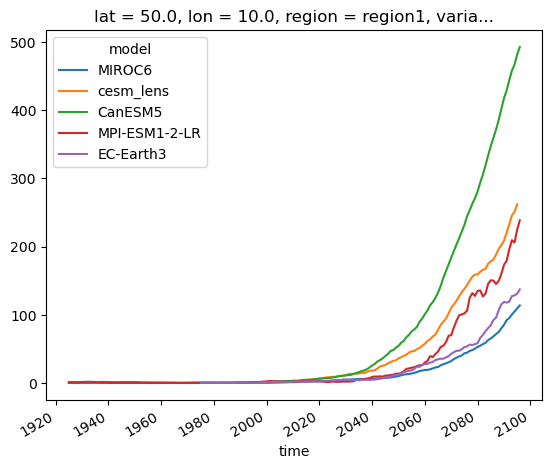

In [174]:
x.mean(('member_id')).isel(region=0, variable=0).plot(hue='model');

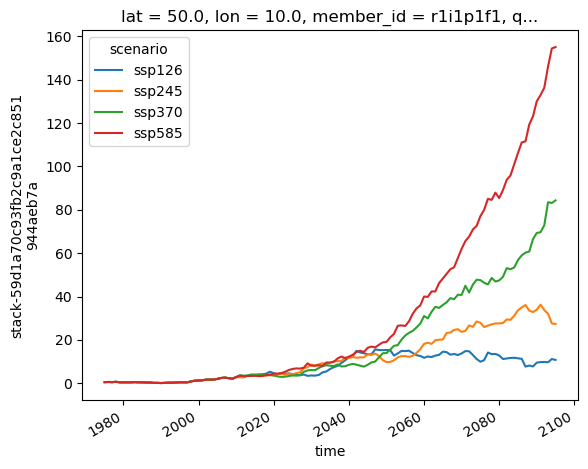

In [177]:
cmip_x.mean('model').isel(region=0, variable=0).plot(hue='scenario')

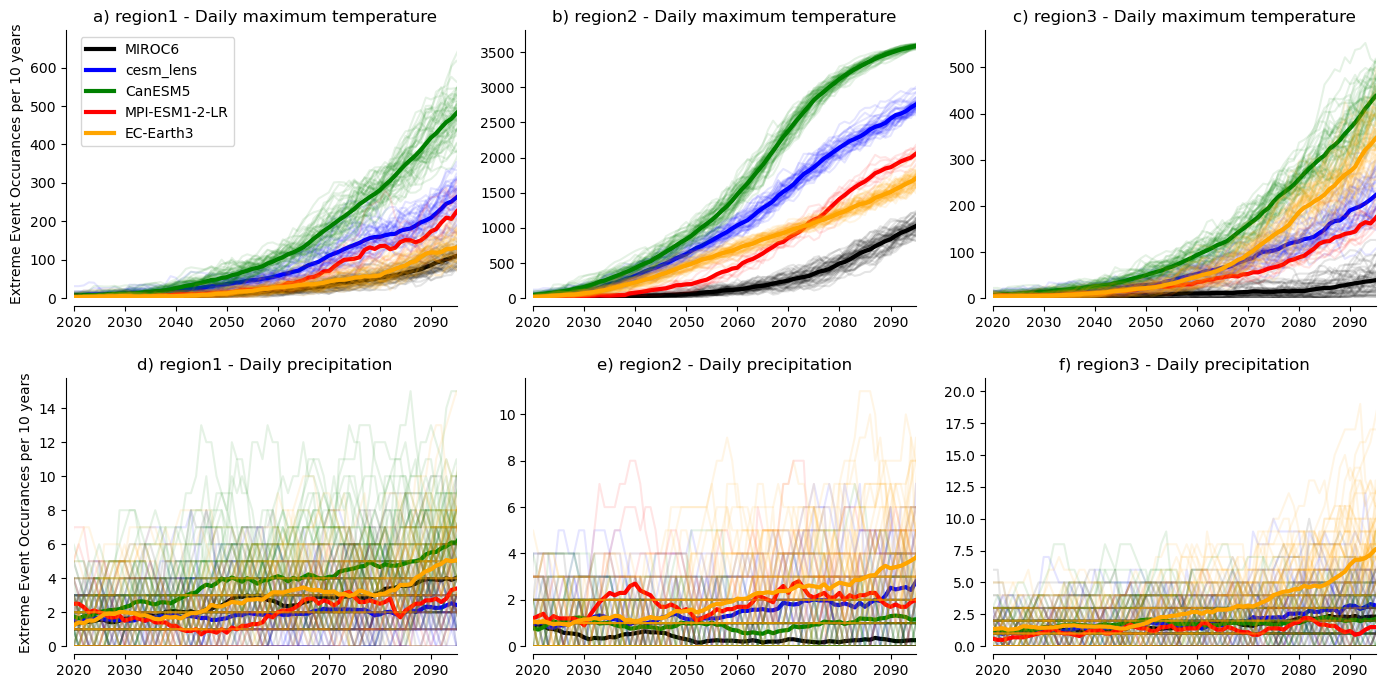

In [169]:
# Figure 1
colors = ['k','b','g','r','orange']
var_dict = {'tasmax': 'Daily maximum temperature', 'pr': 'Daily precipitation'}
fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))

count = 0
for iv, v in enumerate(x['variable'].values):
    for ir, r in enumerate(x.region.values):
        ax = axs[iv, ir]
        for im, m in enumerate(x.model.values):
            x.sel(variable=v, region=r, model=m).mean('member_id').plot(ax=ax, lw=3, c=colors[im], label=m)
            x.sel(variable=v, region=r, model=m).plot(ax=ax, c=colors[im], hue='member_id',add_legend=False, alpha=0.1)
        ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
        ax.set_ylim(bottom=0)
        ax.set_title(f'{string.ascii_lowercase[count]}) {r} - {var_dict[v]}')
        ax.set_xlabel('')
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        ax.spines["bottom"].set_position(("axes", -0.03)) 
        ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
        count += 1
axs[0, 0].legend()
for ax in axs[:, 0]:
    ax.set_ylabel('Extreme Event Occurances per 10 years')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/region_x_ensemble.png', dpi=200)

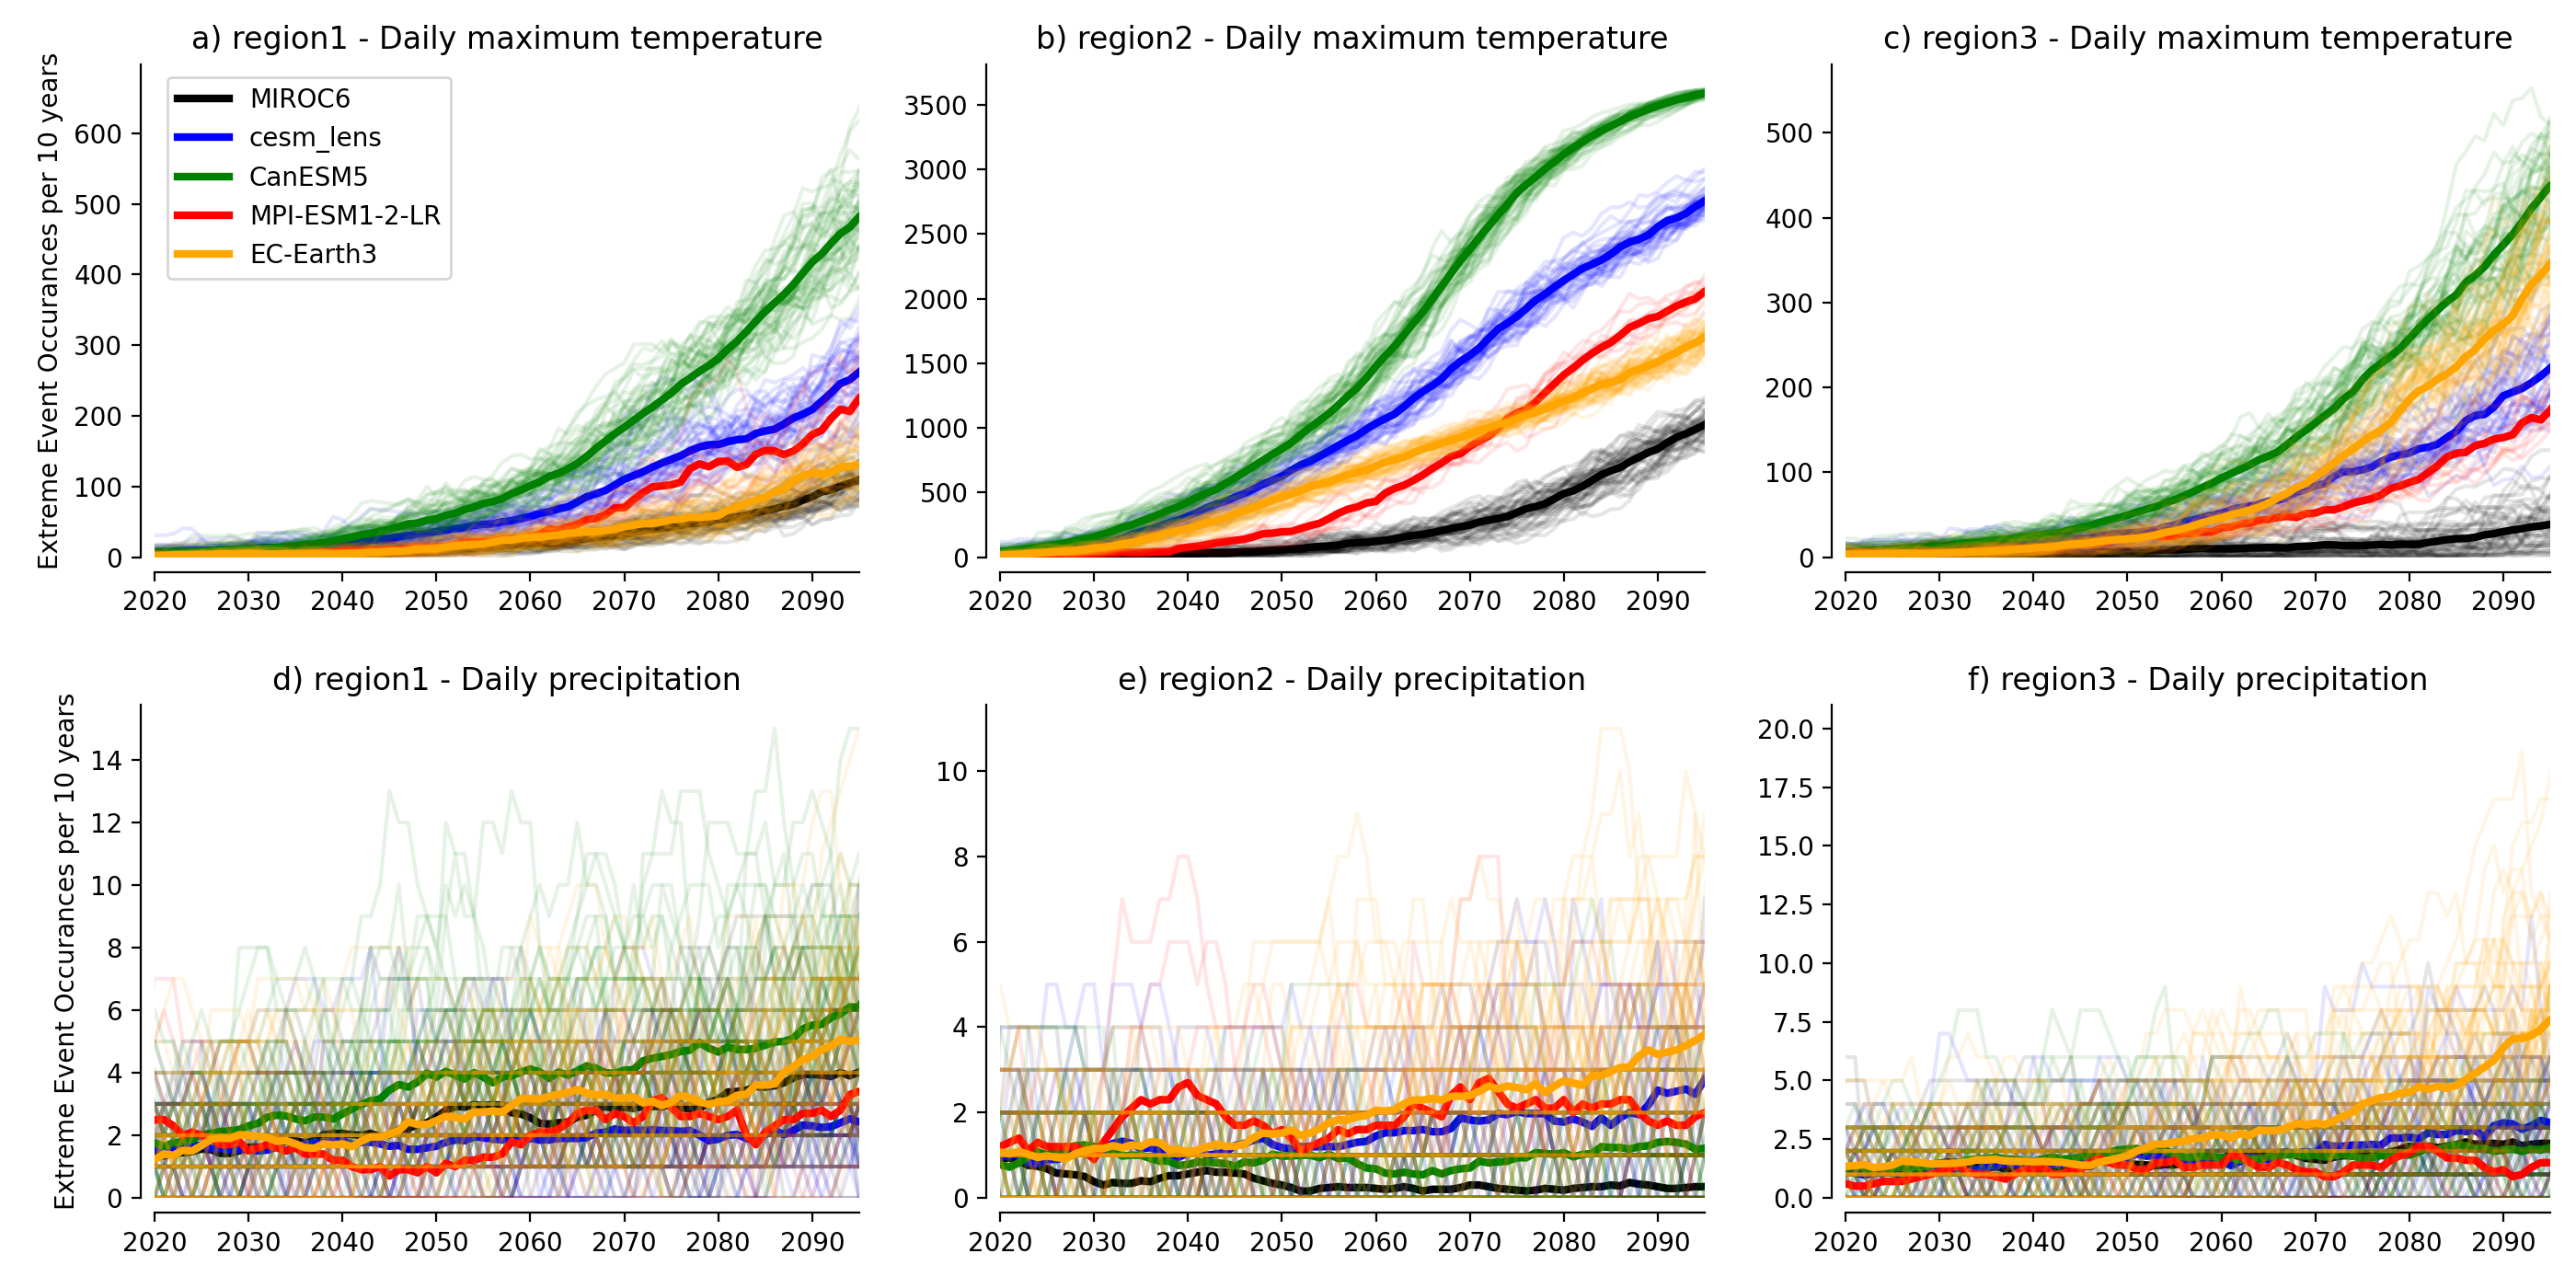

In [170]:
from IPython.display import Image
Image(filename='./plots/region_x_ensemble.png')   # Don't believe what Jupyter shows you!

In [189]:
# define total and total ideal with scenario uncertainty 
total_tas = internal_tas.M_LE + internal_tas.Ibar_LE + S_tas
total_tas_ideal = internal_tas.Ibar_LE + S_tas
total_pr = internal_pr.M_LE + internal_pr.Ibar_LE + S_pr
total_pr_ideal = internal_pr.Ibar_LE + S_pr

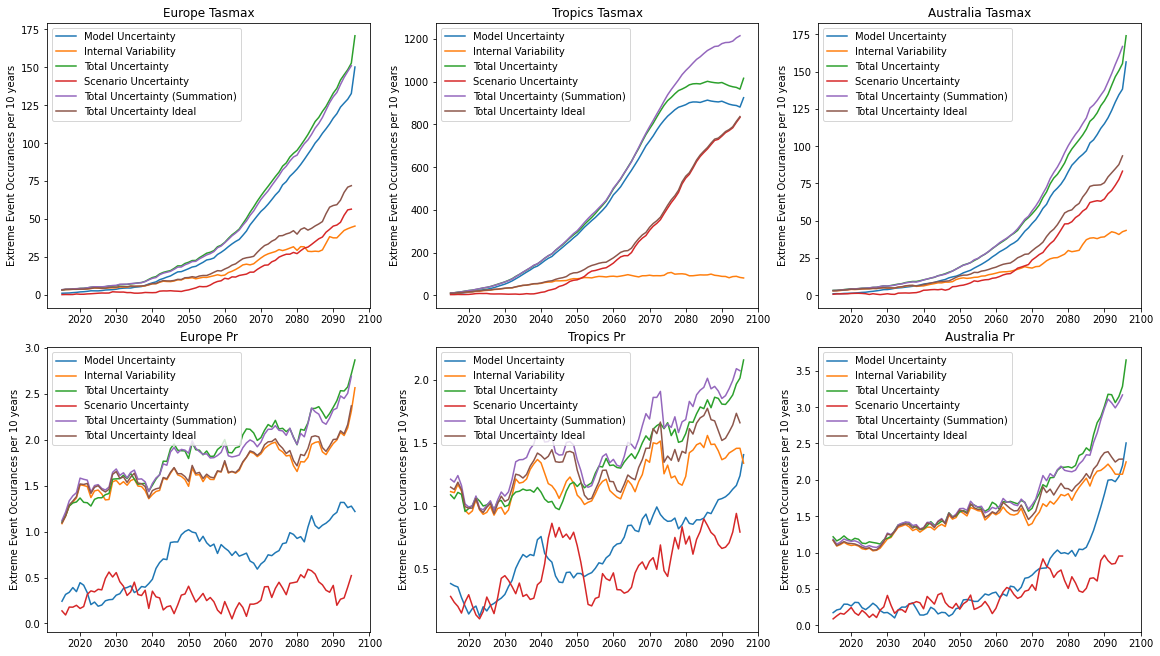

In [190]:
# Figure 2
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
axes = [ax[0,0],ax[0,1],ax[0,2]]
for axis,r,t in zip(axes,regions,titles):
    region = internal_tas.sel(region=r)
    axis.plot(region.time,np.sqrt(region.M_LE), label = 'Model Uncertainty')
    axis.plot(region.time,np.sqrt(region.Ibar_LE),label='Internal Variability')
    axis.plot(region.time,np.sqrt(region.T_LE),label='Total Uncertainty')
    axis.plot(S_tas.sel(region=r).time,np.sqrt(S_tas.sel(region=r)),label='Scenario Uncertainty')
    axis.plot(total_tas.sel(region=r).time,np.sqrt(total_tas.sel(region=r)),label= 'Total Uncertainty (Summation)')
    axis.plot(total_tas_ideal.sel(region=r).time,np.sqrt(total_tas_ideal.sel(region=r)),label= 'Total Uncertainty Ideal')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for axis,r,t in zip(axes,regions,titles):
    region = internal_pr.sel(region=r)
    axis.plot(region.time,np.sqrt(region.M_LE), label = 'Model Uncertainty')
    axis.plot(region.time,np.sqrt(region.Ibar_LE),label='Internal Variability')
    axis.plot(region.time,np.sqrt(region.T_LE),label='Total Uncertainty')
    axis.plot(S_pr.sel(region=r).time,np.sqrt(S_pr.sel(region=r)),label='Scenario Uncertainty')
    axis.plot(total_pr.sel(region=r).time,np.sqrt(total_pr.sel(region=r)),label= 'Total Uncertainty (Summation)')
    axis.plot(total_pr_ideal.sel(region=r).time,np.sqrt(total_pr_ideal.sel(region=r)),label= 'Total Uncertainty Ideal')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')

In [191]:
# total and total ideal without scenario uncertainty 
total_tas = internal_tas.M_LE + internal_tas.Ibar_LE 
total_tas_ideal = internal_tas.Ibar_LE 
total_pr = internal_pr.M_LE + internal_pr.Ibar_LE
total_pr_ideal = internal_pr.Ibar_LE 

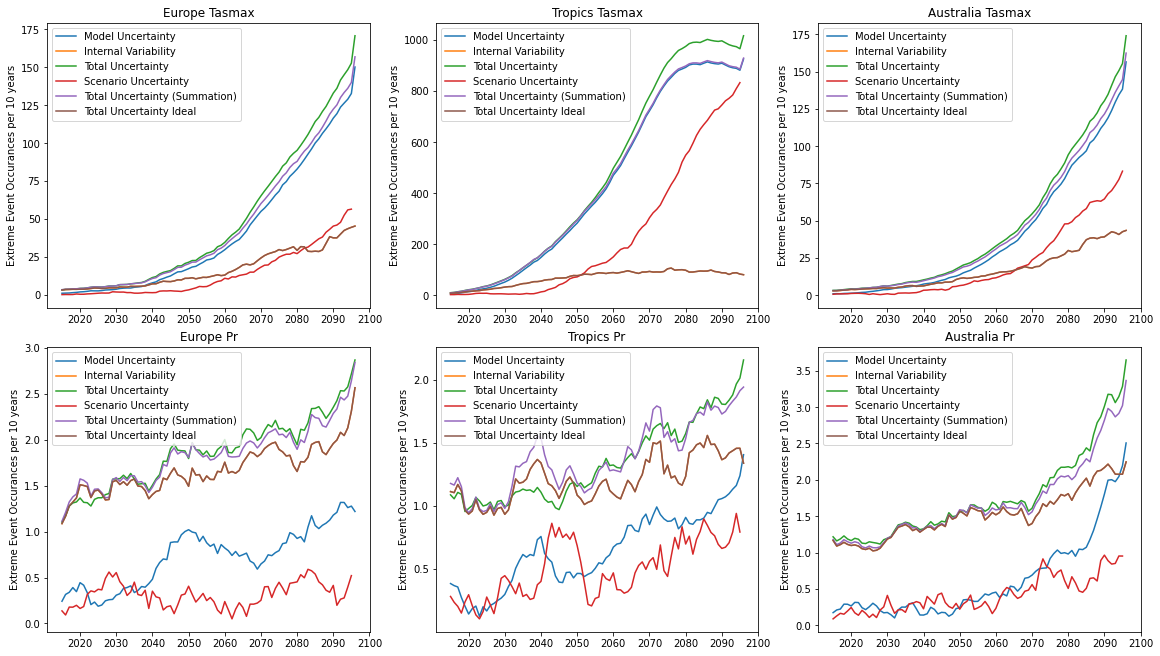

In [192]:
# Figure 2
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
axes = [ax[0,0],ax[0,1],ax[0,2]]
for axis,r,t in zip(axes,regions,titles):
    region = internal_tas.sel(region=r)
    axis.plot(region.time,np.sqrt(region.M_LE), label = 'Model Uncertainty')
    axis.plot(region.time,np.sqrt(region.Ibar_LE),label='Internal Variability')
    axis.plot(region.time,np.sqrt(region.T_LE),label='Total Uncertainty')
    axis.plot(S_tas.sel(region=r).time,np.sqrt(S_tas.sel(region=r)),label='Scenario Uncertainty')
    axis.plot(total_tas.sel(region=r).time,np.sqrt(total_tas.sel(region=r)),label= 'Total Uncertainty (Summation)')
    axis.plot(total_tas_ideal.sel(region=r).time,np.sqrt(total_tas_ideal.sel(region=r)),label= 'Total Uncertainty Ideal')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for axis,r,t in zip(axes,regions,titles):
    region = internal_pr.sel(region=r)
    axis.plot(region.time,np.sqrt(region.M_LE), label = 'Model Uncertainty')
    axis.plot(region.time,np.sqrt(region.Ibar_LE),label='Internal Variability')
    axis.plot(region.time,np.sqrt(region.T_LE),label='Total Uncertainty')
    axis.plot(S_pr.sel(region=r).time,np.sqrt(S_pr.sel(region=r)),label='Scenario Uncertainty')
    axis.plot(total_pr.sel(region=r).time,np.sqrt(total_pr.sel(region=r)),label= 'Total Uncertainty (Summation)')
    axis.plot(total_pr_ideal.sel(region=r).time,np.sqrt(total_pr_ideal.sel(region=r)),label= 'Total Uncertainty Ideal')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')

In [193]:
# calculations for percent contribution plots, including scenario uncertainty
total_tas = internal_tas.M_LE + internal_tas.Ibar_LE + S_tas
total_tas_ideal = internal_tas.Ibar_LE + S_tas
total_pr = internal_pr.M_LE + internal_pr.Ibar_LE + S_pr
total_pr_ideal = internal_pr.Ibar_LE + S_pr

M_frac_tas = (internal_tas.M_LE / total_tas)*100
I_frac_tas = (internal_tas.Ibar_LE / total_tas)*100
S_frac_tas = (S_tas / total_tas)*100
M_frac_pr = (internal_pr.M_LE / total_pr)*100
I_frac_pr = (internal_pr.Ibar_LE / total_pr)*100
S_frac_pr = (S_pr / total_pr)*100

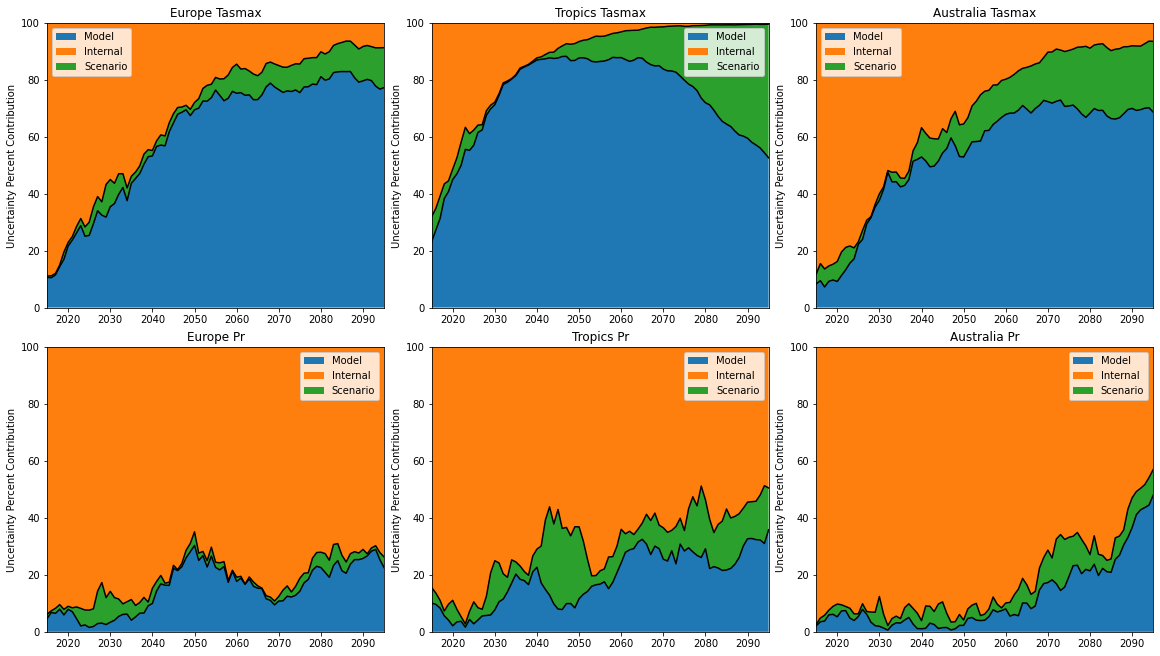

In [194]:
# Figure 3
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
axes = [ax[0,0],ax[0,1],ax[0,2]]
for axis,r,t in zip(axes,regions,titles):
    x = internal_tas.sel(region=r).time
    y1 = M_frac_tas.sel(region=r)
    y2 = y1 + S_frac_tas.sel(region=r)
    axis.fill_between(x,0,y1,label='Model')
    axis.fill_between(x,y2,100,label='Internal')
    axis.fill_between(x,y1,y2,label='Scenario')
    axis.plot(x,y1,color='k')
    axis.plot(x,y2,color='k')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Uncertainty Percent Contribution')
    axis.set_ylim(0,100)
    axis.set_xlim(x[0],x[-5])
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for axis,r,t in zip(axes,regions,titles):
    x = internal_pr.sel(region=r).time
    y1 = M_frac_pr.sel(region=r)
    y2 = y1 + S_frac_pr.sel(region=r)
    axis.fill_between(x,0,y1,label='Model')
    axis.fill_between(x,y2,100,label='Internal')
    axis.fill_between(x,y1,y2,label='Scenario')
    axis.plot(x,y1,color='k')
    axis.plot(x,y2,color='k')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Uncertainty Percent Contribution')
    axis.set_ylim(0,100)
    axis.set_xlim(x[0],x[-5])

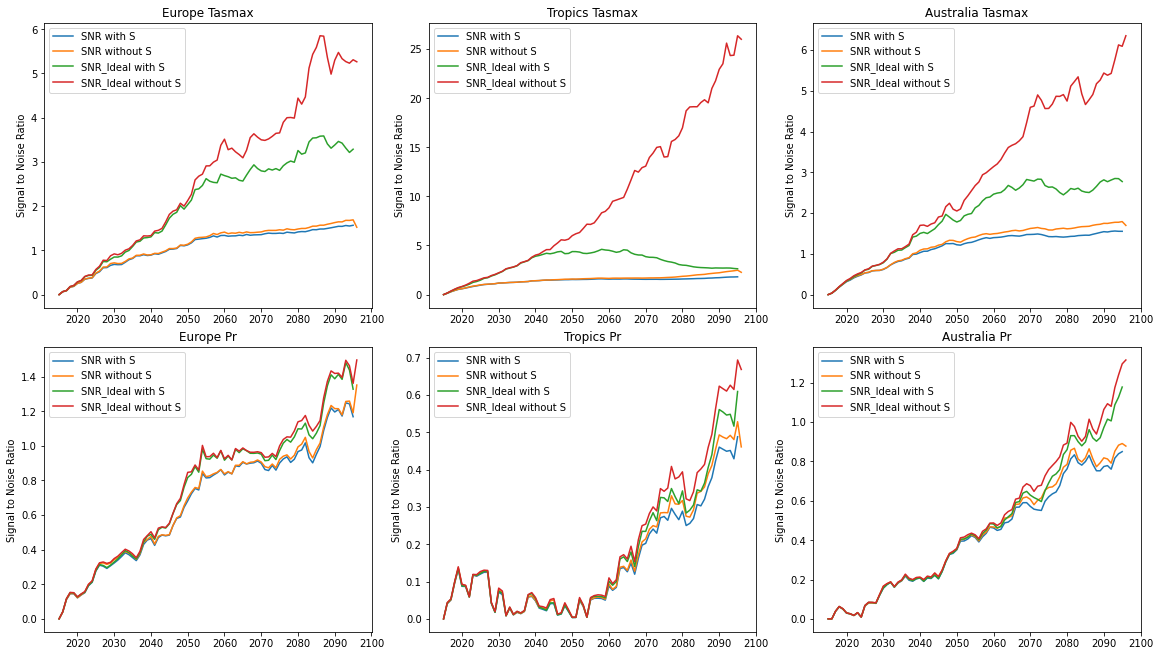

In [195]:
# Figure 4
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
axes = [ax[0,0],ax[0,1],ax[0,2]]
for axis,r,t in zip(axes,regions,titles):
    axis.plot(SNR_tas.sel(region=r).time,SNR_tas.sel(region=r),label='SNR with S')
    axis.plot(SNR_tas1.sel(region=r).time,SNR_tas1.sel(region=r),label='SNR without S')
    axis.plot(SNR_ideal_tas.sel(region=r).time,SNR_ideal_tas.sel(region=r),
              label='SNR_Ideal with S')
    axis.plot(SNR_ideal_tas1.sel(region=r).time,SNR_ideal_tas1.sel(region=r),
              label='SNR_Ideal without S')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Signal to Noise Ratio')
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for axis,r,t in zip(axes,regions,titles):
    axis.plot(SNR_pr.sel(region=r).time,SNR_pr.sel(region=r),label='SNR with S')
    axis.plot(SNR_pr1.sel(region=r).time,SNR_pr1.sel(region=r),label='SNR without S')
    axis.plot(SNR_ideal_pr.sel(region=r).time,SNR_ideal_pr.sel(region=r),
              label='SNR_Ideal with S')
    axis.plot(SNR_ideal_pr1.sel(region=r).time,SNR_ideal_pr1.sel(region=r),
              label='SNR_Ideal without S')

    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Signal to Noise Ratio')

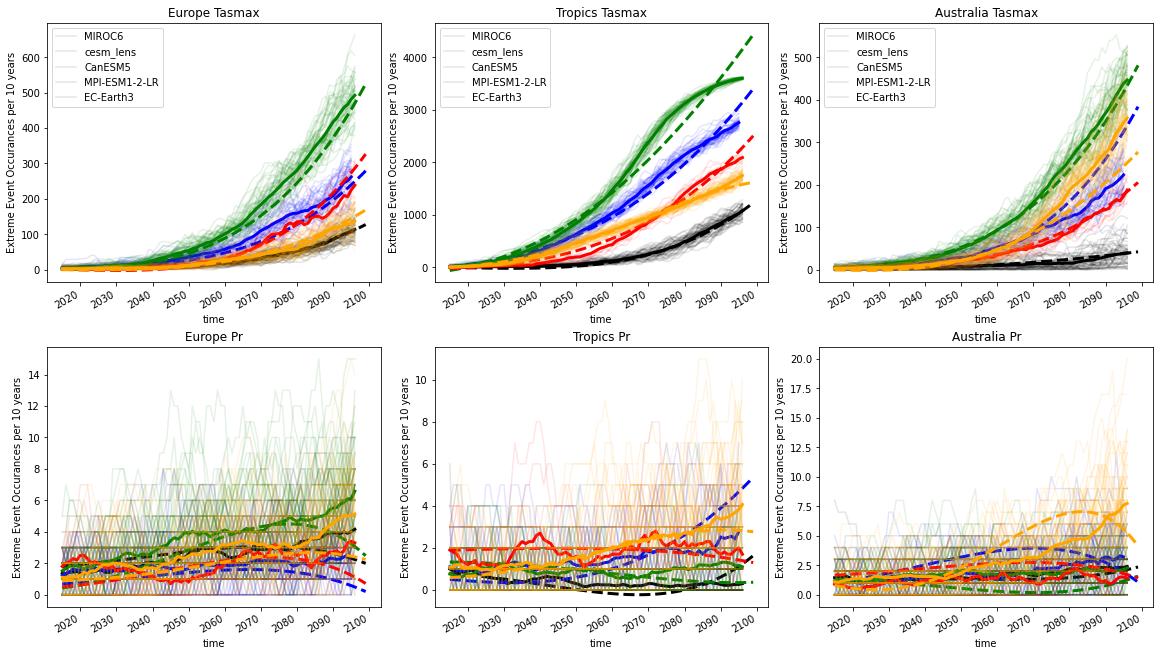

In [200]:
# Polynomial FIT method vs LE 
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
colors = ['k','b','g','r','orange']
axes = [ax[0,0],ax[0,1],ax[0,2]]
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
for m in range(len(tas.model)):
    for axis,r,t in zip(axes,regions,titles):
        region = tas.sel(region=r)
        region.isel(model=m).plot(hue='member_id',add_legend=False,color=colors[m],ax=axis,alpha=0.1)
        region.isel(model=m).mean('member_id').plot(ax=axis,color=colors[m],linewidth=3,add_legend=True)
        internal_tas.sel(region=r).isel(model=m).FIT.plot(ax=axis,color=colors[m],
                                                          linewidth=3,linestyle='dashed')
        axis.set_title(t)
        axis.set_ylabel('Extreme Event Occurances per 10 years')
        labels = ['MIROC6', 'cesm_lens', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3']
        axis.legend(labels=labels)   # not sure why colors arent appearing
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for m in range(len(pr.model)):
    for axis,r,t in zip(axes,regions,titles):
        region = pr.sel(region=r)
        region.isel(model=m).plot(hue='member_id',add_legend=False,color=colors[m],ax=axis,alpha=0.1)
        region.isel(model=m).mean('member_id').plot(ax=axis,color=colors[m],linewidth=3)
        internal_pr.sel(region=r).isel(model=m).FIT.plot(ax=axis,color=colors[m],
                                                          linewidth=3,linestyle='dashed')
        axis.set_title(t)
        axis.set_ylabel('Extreme Event Occurances per 10 years')

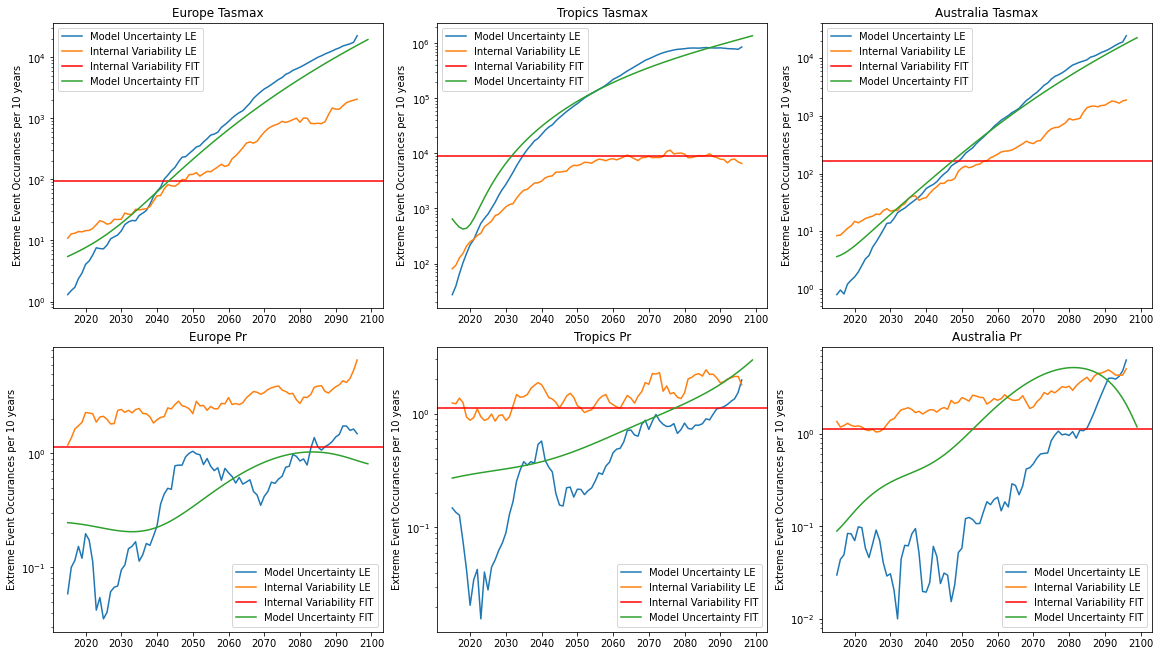

In [207]:
# FIT vs LE method (internal and model uncertainty )
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
axes = [ax[0,0],ax[0,1],ax[0,2]]
for axis,r,t in zip(axes,regions,titles):
    region = internal_tas.sel(region=r)
    axis.plot(region.time,region.M_LE, label = 'Model Uncertainty LE')
    axis.plot(region.time,region.Ibar_LE,label='Internal Variability LE')
    axis.axhline(region.Ibar_FIT,label='Internal Variability FIT',color='r')
    axis.plot(region.time,region.M_FIT,label='Model Uncertainty FIT')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')
    axis.set_yscale('log')
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for axis,r,t in zip(axes,regions,titles):
    region = internal_pr.sel(region=r)
    axis.plot(region.time,region.M_LE, label = 'Model Uncertainty LE')
    axis.plot(region.time,region.Ibar_LE,label='Internal Variability LE')
    axis.axhline(region.Ibar_FIT,label='Internal Variability FIT',color='r')
    axis.plot(region.time,region.M_FIT,label='Model Uncertainty FIT')
    axis.set_yscale('log')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')

In [241]:
tas_scenario_results = tas_scenario_results.sel(time=slice('2015',None))
pr_scenario_results = pr_scenario_results.sel(time=slice('2015',None))

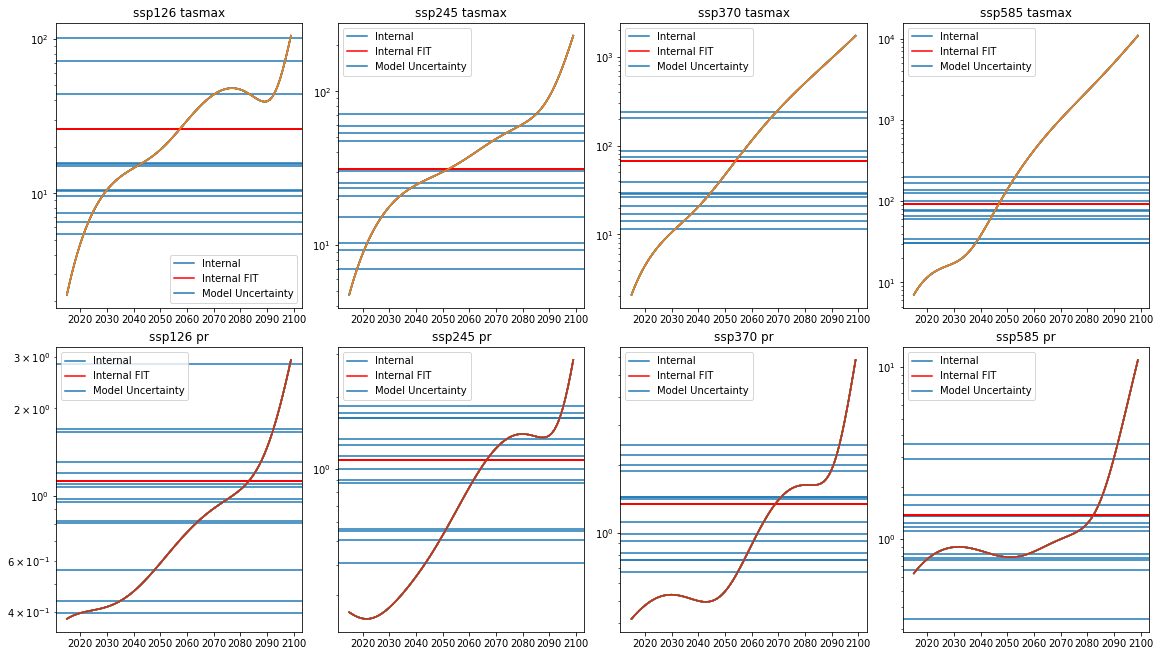

In [242]:
# scenario affect on variabilities for Europe 
fig,ax = plt.subplots(nrows=2,ncols=4, constrained_layout=True,figsize=(16,9))

axes = [ax[0,0],ax[0,1],ax[0,2],ax[0,3]]
titles = ['ssp126 tasmax','ssp245 tasmax','ssp370 tasmax','ssp585 tasmax']
for s,axis,t in zip(range(len(tas_scenario_results.scenario)),axes,titles):
    for m in range(len(tas_scenario_results.model)):
        axis.axhline(tas_scenario_results.isel(region=0,scenario=s,model=m).I_FIT)
        axis.axhline(tas_scenario_results.isel(region=0,scenario=s).Ibar_FIT,color='r')
        axis.plot(tas_scenario_results.isel(region=0,scenario=s).time,
                 tas_scenario_results.isel(region=0,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)
        
axes = [ax[1,0],ax[1,1],ax[1,2],ax[1,3]]
titles = ['ssp126 pr','ssp245 pr','ssp370 pr','ssp585 pr']
for s,axis,t in zip(range(len(pr_scenario_results.scenario)),axes,titles):
    for m in range(len(pr_scenario_results.model)):
        axis.axhline(pr_scenario_results.isel(region=0,scenario=s,model=m).I_FIT)
        axis.axhline(pr_scenario_results.isel(region=0,scenario=s).Ibar_FIT,color='r')
        axis.plot(pr_scenario_results.isel(region=0,scenario=s).time,
                 pr_scenario_results.isel(region=0,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)

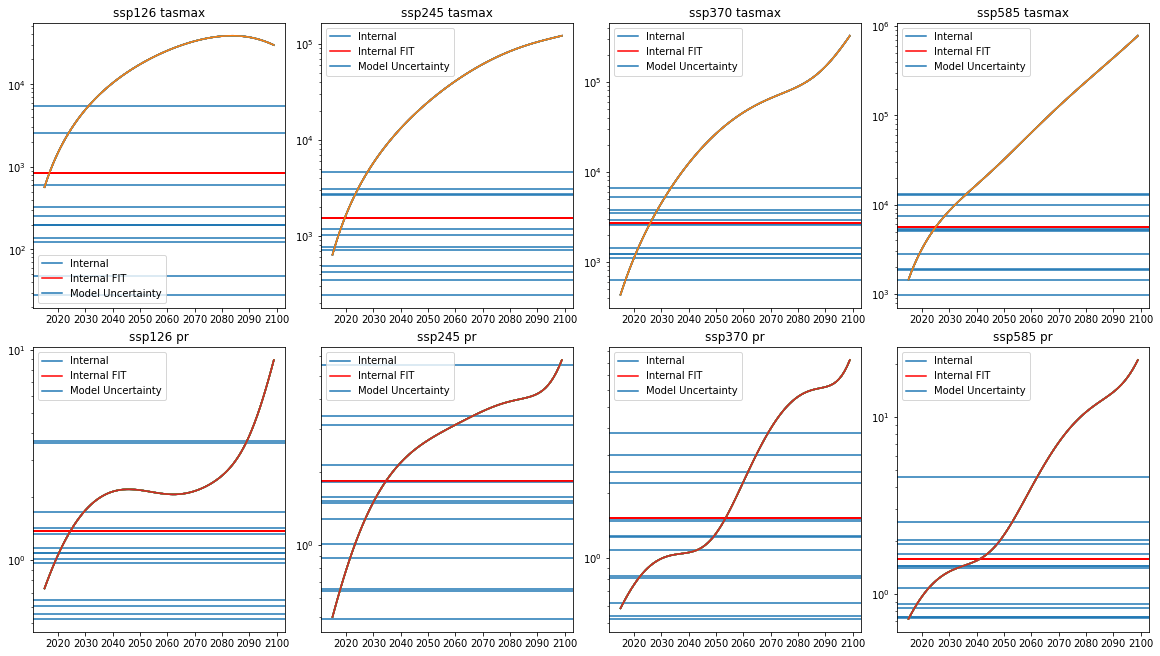

In [243]:
# scenario affect on variabilities for Tropics
fig,ax = plt.subplots(nrows=2,ncols=4, constrained_layout=True,figsize=(16,9))

axes = [ax[0,0],ax[0,1],ax[0,2],ax[0,3]]
titles = ['ssp126 tasmax','ssp245 tasmax','ssp370 tasmax','ssp585 tasmax']
for s,axis,t in zip(range(len(tas_scenario_results.scenario)),axes,titles):
    for m in range(len(tas_scenario_results.model)):
        axis.axhline(tas_scenario_results.isel(region=1,scenario=s,model=m).I_FIT)
        axis.axhline(tas_scenario_results.isel(region=1,scenario=s).Ibar_FIT,color='r')
        axis.plot(tas_scenario_results.isel(region=1,scenario=s).time,
                 tas_scenario_results.isel(region=1,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)
        
axes = [ax[1,0],ax[1,1],ax[1,2],ax[1,3]]
titles = ['ssp126 pr','ssp245 pr','ssp370 pr','ssp585 pr']
for s,axis,t in zip(range(len(pr_scenario_results.scenario)),axes,titles):
    for m in range(len(pr_scenario_results.model)):
        axis.axhline(pr_scenario_results.isel(region=1,scenario=s,model=m).I_FIT)
        axis.axhline(pr_scenario_results.isel(region=1,scenario=s).Ibar_FIT,color='r')
        axis.plot(pr_scenario_results.isel(region=1,scenario=s).time,
                 pr_scenario_results.isel(region=1,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)

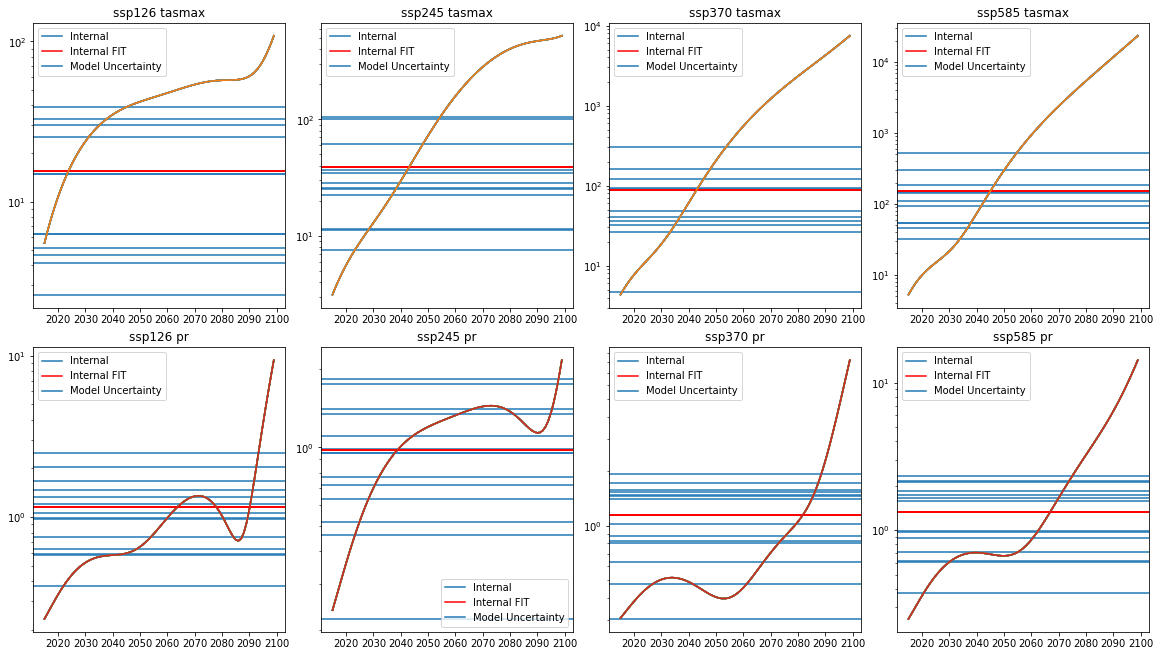

In [245]:
# scenario affect on variabilities for Australia 
fig,ax = plt.subplots(nrows=2,ncols=4, constrained_layout=True,figsize=(16,9))

axes = [ax[0,0],ax[0,1],ax[0,2],ax[0,3]]
titles = ['ssp126 tasmax','ssp245 tasmax','ssp370 tasmax','ssp585 tasmax']
for s,axis,t in zip(range(len(tas_scenario_results.scenario)),axes,titles):
    for m in range(len(tas_scenario_results.model)):
        axis.axhline(tas_scenario_results.isel(region=2,scenario=s,model=m).I_FIT)
        axis.axhline(tas_scenario_results.isel(region=2,scenario=s).Ibar_FIT,color='r')
        axis.plot(tas_scenario_results.isel(region=2,scenario=s).time,
                 tas_scenario_results.isel(region=2,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)
        
axes = [ax[1,0],ax[1,1],ax[1,2],ax[1,3]]
titles = ['ssp126 pr','ssp245 pr','ssp370 pr','ssp585 pr']
for s,axis,t in zip(range(len(pr_scenario_results.scenario)),axes,titles):
    for m in range(len(pr_scenario_results.model)):
        axis.axhline(pr_scenario_results.isel(region=2,scenario=s,model=m).I_FIT)
        axis.axhline(pr_scenario_results.isel(region=2,scenario=s).Ibar_FIT,color='r')
        axis.plot(pr_scenario_results.isel(region=2,scenario=s).time,
                 pr_scenario_results.isel(region=2,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)

## loading by location

In [3]:
# setting 
variable = 'tas'
# variable = 'tasmax'
# variable = 'pr'
models = ['MIROC6', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3','cesm_lens']

In [4]:
USwest = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=37.7, lon=237.6, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [5]:
europe = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=51, lon=10.5, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [6]:
australia = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=-25.2, lon=133.7, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [7]:
tropics = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=3.9, lon=306.9, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

### Compute variabilities 

In [20]:
USwest.compute_x(x_type='quantile_return',load=True,name='USwest_internal_tas')
USwest.compute_LE()
USwest.compute_FIT()
USwest_internal = USwest.results.squeeze()

In [17]:
europe.compute_x(x_type='quantile_return',load=False,name='europe_internal_tas')
europe.compute_LE()
europe.compute_FIT()
europe_internal = europe.results.squeeze()

100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

1.6518402099609375
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/europe_internal_tas/MIROC6.zarr



100%|██████████| 1/1 [00:01<00:00,  1.87s/it]

1.6497039794921875
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/europe_internal_tas/CanESM5.zarr



100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

1.65643310546875
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/europe_internal_tas/MPI-ESM1-2-LR.zarr



100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

1.6574783325195312
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/europe_internal_tas/EC-Earth3.zarr



100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

1.6640548706054688
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/europe_internal_tas/cesm_lens.zarr


In [18]:
australia.compute_x(x_type='quantile_return',load=False,name='australia_internal_tas')
australia.compute_LE()
australia.compute_FIT()
australia_internal = australia.results.squeeze()

100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

1.6724472045898438
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/australia_internal_tas/MIROC6.zarr



100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

1.6681175231933594
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/australia_internal_tas/CanESM5.zarr



100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

1.6689109802246094
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/australia_internal_tas/MPI-ESM1-2-LR.zarr



100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

1.6669464111328125
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/australia_internal_tas/EC-Earth3.zarr



100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

1.6953239440917969
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/australia_internal_tas/cesm_lens.zarr


In [19]:
tropics.compute_x(x_type='quantile_return',load=False,name='tropics_internal_tas')
tropics.compute_LE()
tropics.compute_FIT()
tropics_internal = tropics.results.squeeze()

100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

1.6721305847167969
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tropics_internal_tas/MIROC6.zarr



100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

1.6629562377929688
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tropics_internal_tas/CanESM5.zarr



100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

1.6624069213867188
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tropics_internal_tas/MPI-ESM1-2-LR.zarr



100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

1.6800727844238281
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tropics_internal_tas/EC-Earth3.zarr



100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

1.6795692443847656
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tropics_internal_tas/cesm_lens.zarr


In [22]:
# merge datasets by region
regions = [USwest_internal,europe_internal,australia_internal,tropics_internal]
dss = []
for region in regions:
    internal = region.expand_dims('region')
    dss.append(internal)
regions = ['USwest','europe','australia','tropics']
internal = xr.concat(dss,dim='region')
internal = internal.assign_coords({'region':regions})

In [31]:
internal.time[95]

<xarray.DataArray 'time' ()>
array('2015-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2015-01-01

In [25]:
internal['M_LE_frac'] = (internal.M_LE/(internal.Ibar_LE+internal.M_LE))*100
internal['M_FIT_frac'] = (internal.M_FIT/(internal.Ibar_FIT+internal.M_FIT))*100
internal['I_LE_frac'] = (internal.Ibar_LE/(internal.Ibar_LE+internal.M_LE))*100
internal['I_FIT_frac'] = (internal.Ibar_FIT/(internal.Ibar_FIT+internal.M_FIT))*100

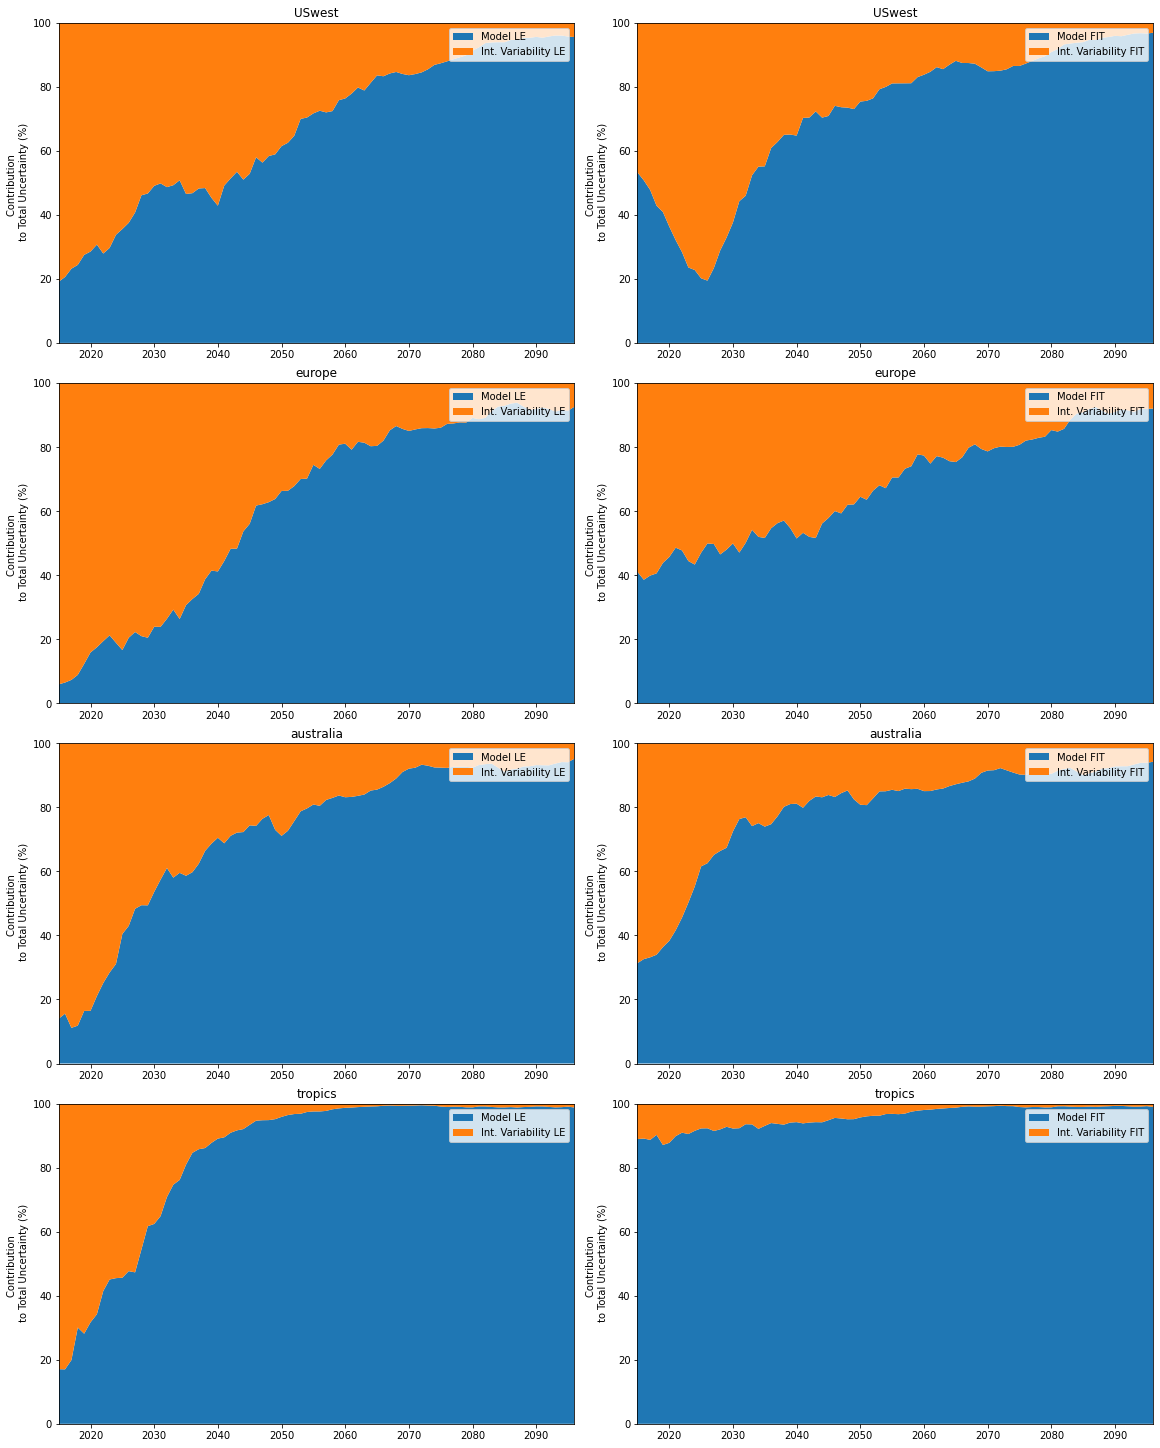

In [67]:
# INTERNAL MEAN
fig,ax = plt.subplots(nrows=4,ncols=2, constrained_layout=True,figsize=(16,20))

regions = ['USwest','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0]]
for axis,region in zip(axes,regions):
    x=internal.sel(region=region).time
    y=internal.sel(region=region).M_LE_frac
    axis.fill_between(x,y,label='Model LE')
    # axis.plot(internal.sel(region=region).time,internal.sel(region=region).M_LE_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability LE')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[95],x[-5])
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1]]
for axis,region in zip(axes,regions):
    x=internal.sel(region=region).time
    y=internal.sel(region=region).M_FIT_frac
    axis.fill_between(x,y,label='Model FIT')
    # axis.plot(internal.sel(region=region).time,internal.sel(region=region).M_FIT_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability FIT')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[95],x[-5])

In [33]:
internal

<xarray.Dataset>
Dimensions:     (time: 181, region: 4, model: 5, member_id: 71)
Coordinates:
  * time        (time) datetime64[ns] 1920-01-01 1921-01-01 ... 2100-01-01
    lat         (region) float64 37.5 50.0 -25.0 5.0
    lon         (region) float64 237.5 10.0 132.5 307.5
  * model       (model) <U13 'MIROC6' 'CanESM5' ... 'EC-Earth3' 'cesm_lens'
    quantile    (model) float64 0.9997 0.9997 0.9997 0.9997 0.9997
    q_values    (region, model) float64 299.7 300.6 299.2 ... 303.0 301.9 300.1
  * member_id   (member_id) int64 1 2 3 4 5 6 7 8 9 ... 64 65 66 67 68 69 70 71
  * region      (region) <U9 'USwest' 'europe' 'australia' 'tropics'
Data variables: (12/13)
    M_LE        (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    I_LE        (region, model, time) float64 dask.array<chunksize=(1, 1, 181), meta=np.ndarray>
    Ibar_LE     (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    T_LE        (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    FIT         (region, time, model) float64 dask.array<chunksize=(1, 181, 1), meta=np.ndarray>
    M_FIT       (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    ...          ...
    Ibar_FIT    (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    T_FIT       (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    M_LE_frac   (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    M_FIT_frac  (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    I_LE_frac   (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    I_FIT_frac  (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>

In [34]:
internal['total_LE'] = internal.Ibar_LE + internal.M_LE
internal['total_FIT'] = internal.Ibar_FIT + internal.M_FIT

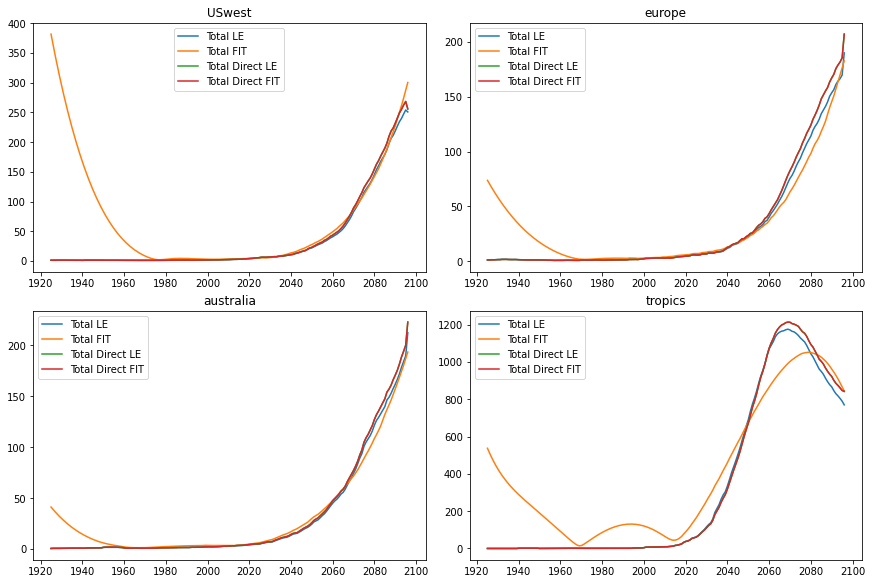

In [61]:
# INTERNAL MEAN
fig,ax = plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))

regions = ['USwest','europe','australia','tropics']
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
for axis,r in zip(axes,regions):
    region = internal.sel(region=r)
    axis.plot(region.time,np.sqrt(region.total_LE), label = 'Total LE')
    axis.plot(region.time,np.sqrt(region.total_FIT),label='Total FIT')
    axis.plot(region.time,np.sqrt(region.T_LE),label='Total Direct LE')
    axis.plot(region.time,np.sqrt(region.T_FIT),label='Total Direct FIT')
    axis.legend()
    axis.set_title(r)
# what are these units??

In [78]:
USwest.x

<xarray.DataArray 'tas' (model: 5, member_id: 71, time: 181, lat: 1, lon: 1)>
dask.array<concatenate, shape=(5, 71, 181, 1, 1), dtype=float64, chunksize=(1, 71, 181, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * model      (model) <U13 'MIROC6' 'CanESM5' ... 'EC-Earth3' 'cesm_lens'
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 9 ... 64 65 66 67 68 69 70 71
  * time       (time) datetime64[ns] 1920-01-01 1921-01-01 ... 2100-01-01
  * lat        (lat) float64 37.5
  * lon        (lon) float64 237.5
    q_values   (model, lat, lon) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    quantile   (model) float64 0.9997 0.9997 0.9997 0.9997 0.9997

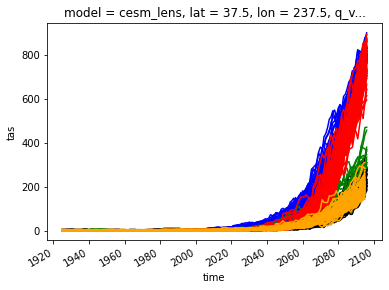

In [87]:
colors = ['k','b','g','r','orange']
for m in range(len(USwest.x.model)):
    USwest.x.squeeze().isel(model=m).plot(hue='member_id',add_legend=False,color=colors[m]);

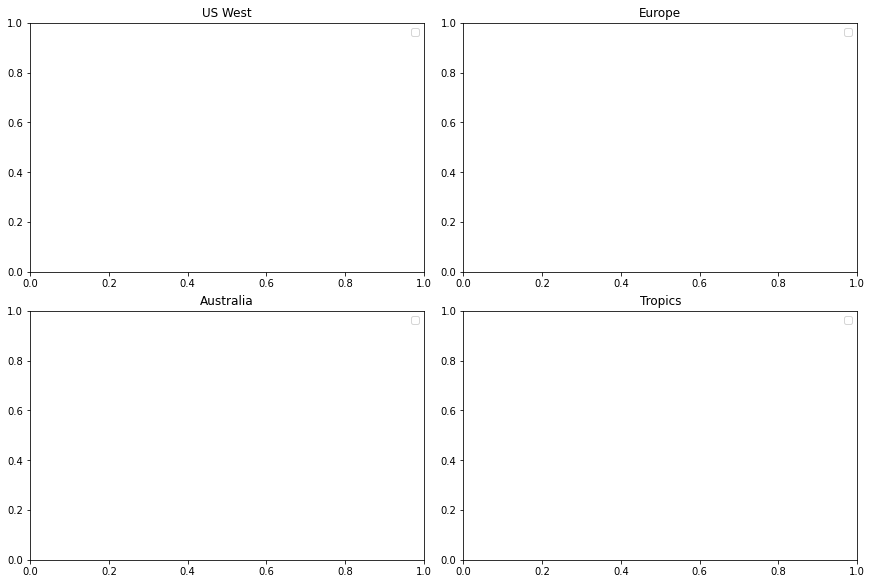

In [81]:
fig, axe = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(12,8))
regions = [USwest,europe,australia,tropics]
axes = [axe[0,0],axe[0,1],axe[1,0],axe[1,1]]
titles = ['US West', 'Europe', 'Australia', 'Tropics']
for r,a,t in zip(regions,axes,titles):
    for m in range(len(USwest.x.model)):
        a.plot(r.x.time,r.x.isel(model=m).squeeze().mean(dim=['member_id']))
        r.x.squeeze().isel(model=m).plot(hue='member_id',ax=axis)
    labels = ['MIROC6', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3', 'cesm_lens']
    a.legend(labels=labels)
    a.set_title(t)